📊 LOADING CREDIT CARD FRAUD DATASET

✅ Dataset Shape: (279191, 31)
   Rows: 279,191
   Columns: 31

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279191 entries, 0 to 279190
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    279191 non-null  float64
 1   V1      279191 non-null  float64
 2   V2      279191 non-null  float64
 3   V3      279191 non-null  float64
 4   V4      279191 non-null  float64
 5   V5      279191 non-null  float64
 6   V6      279190 non-null  float64
 7   V7      279190 non-null  float64
 8   V8      279190 non-null  float64
 9   V9      279190 non-null  float64
 10  V10     279190 non-null  float64
 11  V11     279190 non-null  float64
 12  V12     279190 non-null  float64
 13  V13     279190 non-null  float64
 14  V14     279190 non-null  float64
 15  V15     279190 non-null  float64
 16  V16     279190 non-null  float64
 17  V17     279190 non-null  float64
 18  V18     

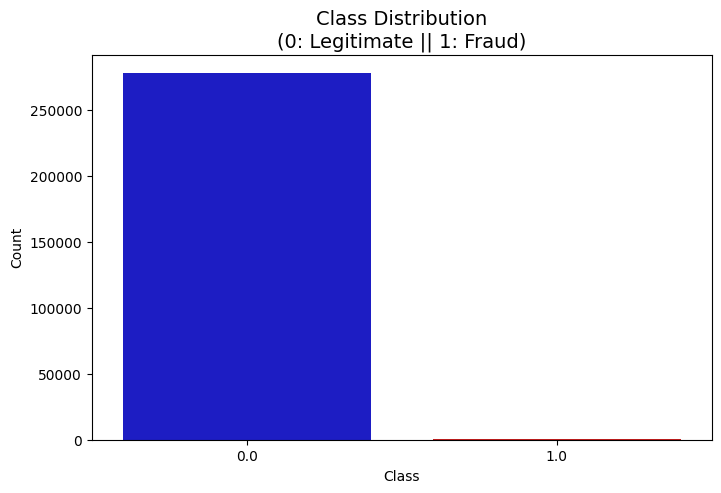


🔧 FEATURE ENGINEERING: Time-based Features
✅ Created 3 new features:
   - Hour: Hour of the day (0-23)
   - Time_sin: Sine transformation of Hour
   - Time_cos: Cosine transformation of Hour

📊 New dataset shape: (278142, 34)

First few rows with new features:
       Time       Hour  Time_sin  Time_cos  Amount  Class
0  149246.0  17.457222 -0.989921 -0.141621   17.35    0.0
1   56010.0  15.558333 -0.802557 -0.596575   25.18    0.0
2  142697.0  15.638056 -0.814833 -0.579696  367.32    0.0
3  115014.0   7.948333  0.872709 -0.488240    1.00    0.0
4   69071.0  19.186389 -0.952152  0.305626   54.68    0.0

🔍 Checking for NaN values after feature engineering:
⚠️  Found NaN values:
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64



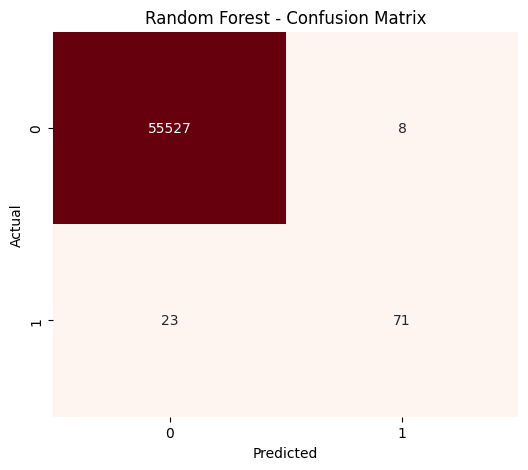

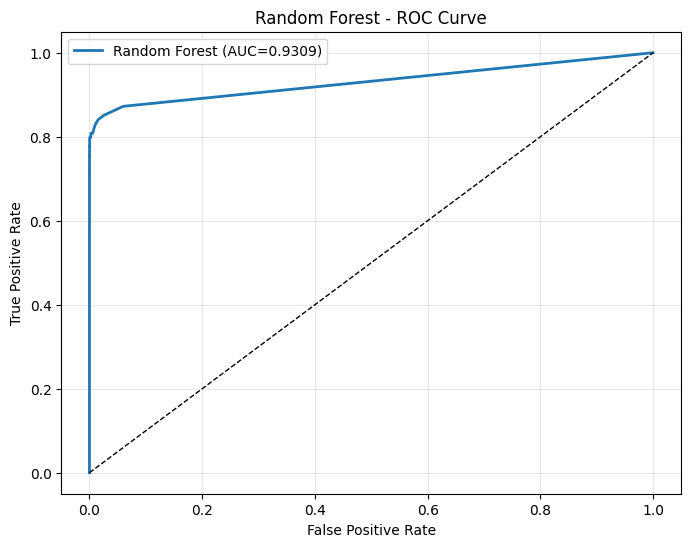


📊 Bagged Trees Results
              precision    recall  f1-score   support

         0.0     0.9998    0.6631    0.7974     55535
         1.0     0.0046    0.9149    0.0091        94

    accuracy                         0.6636     55629
   macro avg     0.5022    0.7890    0.4032     55629
weighted avg     0.9981    0.6636    0.7961     55629

ROC AUC: 0.8991
Training Time: 1828.90s


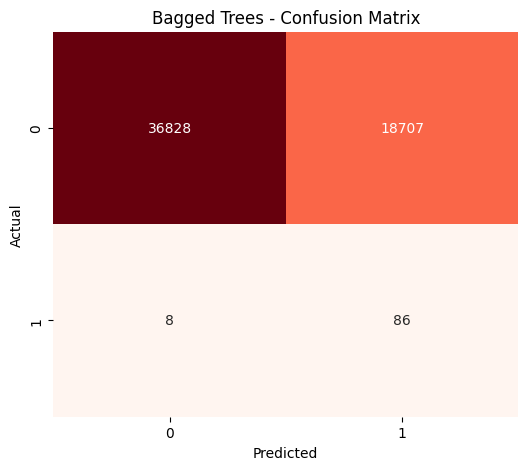

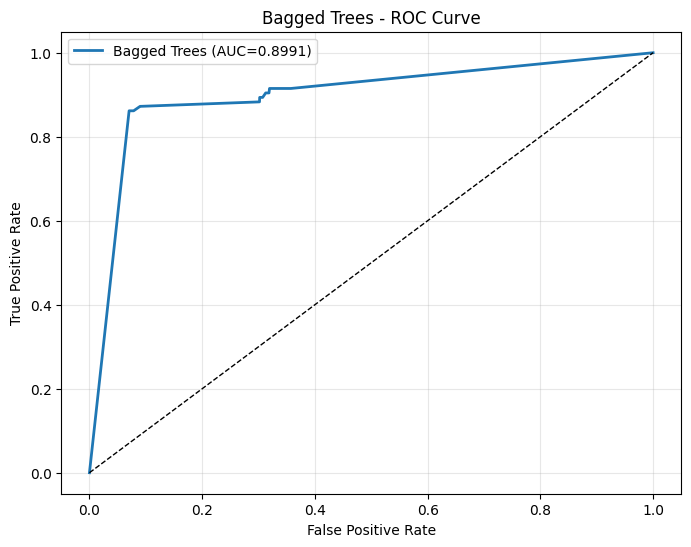


🚀 TRAINING BOOSTING ENSEMBLE MODELS

[1/3] Training AdaBoost...
   ✅ Completed in 526.99s

[2/3] Training Gradient Boosting...
   ✅ Completed in 1504.02s

[3/3] Training XGBoost...
   ✅ Completed in 11.85s

📊 AdaBoost Results
              precision    recall  f1-score   support

         0.0     0.9998    0.9796    0.9896     55535
         1.0     0.0675    0.8723    0.1253        94

    accuracy                         0.9794     55629
   macro avg     0.5336    0.9260    0.5574     55629
weighted avg     0.9982    0.9794    0.9881     55629

ROC AUC: 0.9783
Training Time: 526.99s


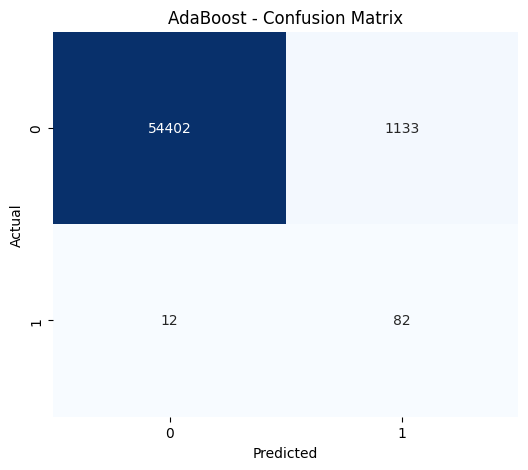

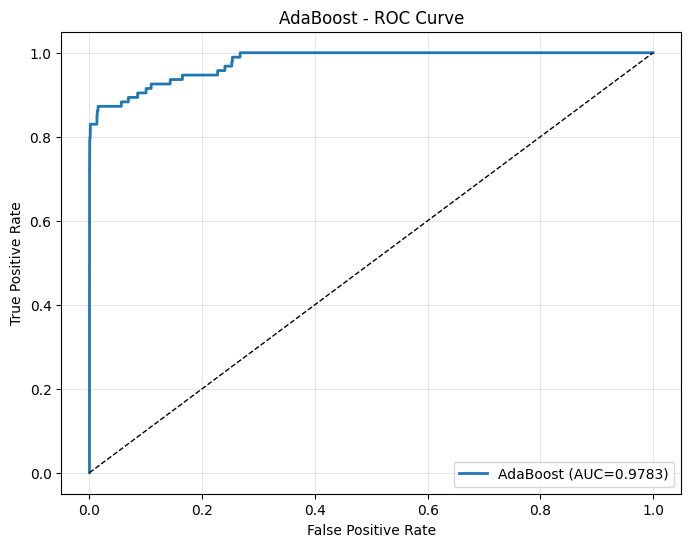


📊 Gradient Boosting Results
              precision    recall  f1-score   support

         0.0     0.9997    0.9902    0.9949     55535
         1.0     0.1256    0.8298    0.2182        94

    accuracy                         0.9900     55629
   macro avg     0.5627    0.9100    0.6066     55629
weighted avg     0.9982    0.9900    0.9936     55629

ROC AUC: 0.9719
Training Time: 1504.02s


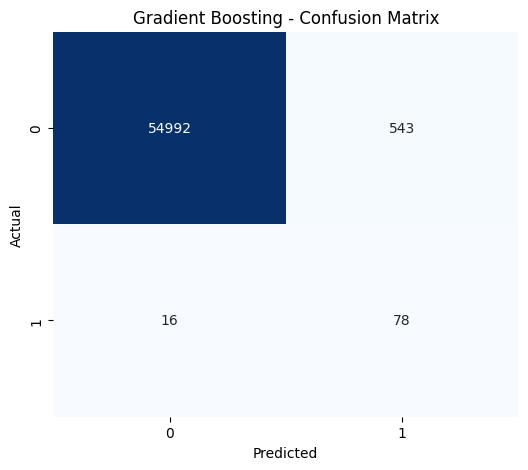

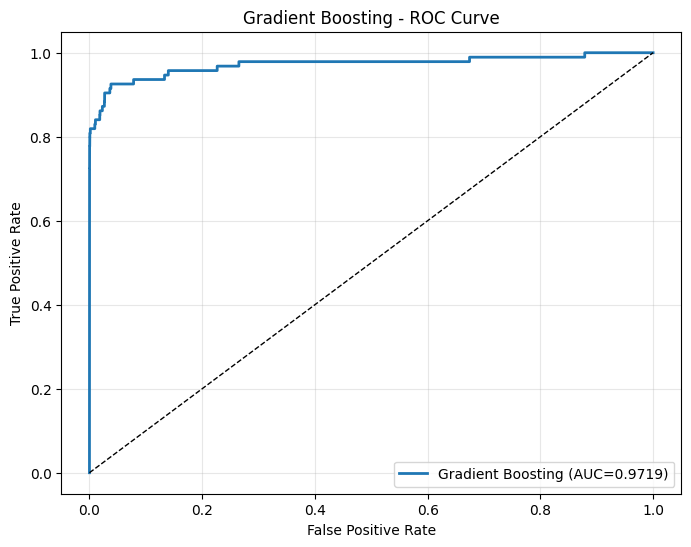


📊 XGBoost Results
              precision    recall  f1-score   support

         0.0     0.9997    0.9991    0.9994     55535
         1.0     0.5938    0.8085    0.6847        94

    accuracy                         0.9987     55629
   macro avg     0.7967    0.9038    0.8420     55629
weighted avg     0.9990    0.9987    0.9988     55629

ROC AUC: 0.9578
Training Time: 11.85s


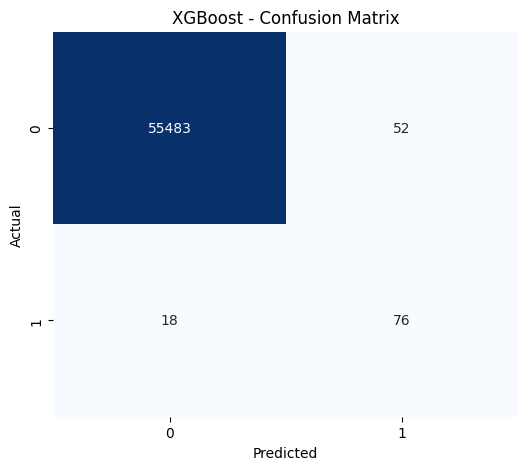

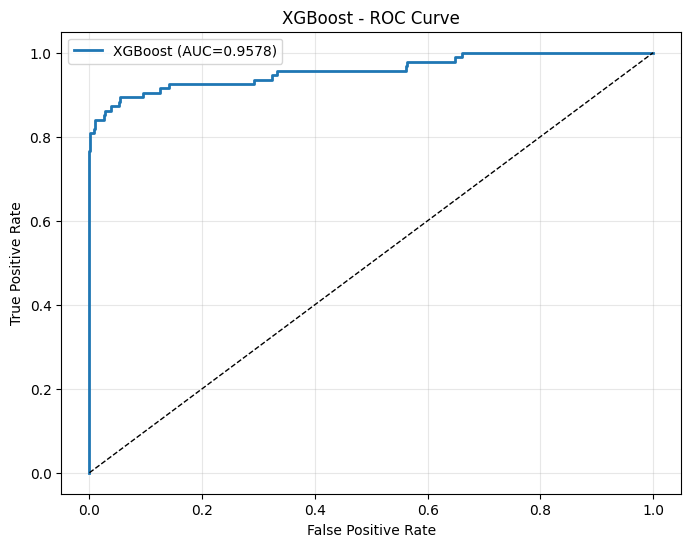


🎯 TRAINING STACKING ENSEMBLE MODEL

Building Stacking Classifier...


In [ ]:
# ========================================
# 🅰️ A. Problem Definition
# ========================================
"""
Objective: Detect fraudulent credit card transactions
Type: Binary Classification (Fraud=1, Genuine=0)
Challenge: Highly Imbalanced Dataset (~0.17% fraud)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

# ========================================
# 🅱️ B. Data Loading & Exploration
# ========================================
print("="*60)
print("📊 LOADING CREDIT CARD FRAUD DATASET")
print("="*60)

df = pd.read_csv('creditcard.csv')
pd.options.display.max_columns = None

print(f"\n✅ Dataset Shape: {df.shape}")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

# Basic Info
print("\n📋 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum().sum(), "missing values found")

# Remove duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"\n⚠️  Found {duplicates} duplicate rows - Removing...")
    df = df.drop_duplicates()
    print(f"✅ After removing duplicates: {df.shape[0]:,} rows")

# Class Distribution
print("\n" + "="*60)
print("📊 CLASS DISTRIBUTION")
print("="*60)
fraud_pct = round(df['Class'].value_counts()[1] / len(df) * 100, 4)
legit_pct = round(df['Class'].value_counts()[0] / len(df) * 100, 4)
print(f"💳 Legitimate Transactions: {legit_pct}%")
print(f"🚨 Fraudulent Transactions: {fraud_pct}%")
print(f"⚖️  Imbalance Ratio: 1:{int(legit_pct/fraud_pct)}")

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize class distribution
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution\n(0: Legitimate || 1: Fraud)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# ========================================
# 🔧 FEATURE ENGINEERING
# ========================================
print("\n" + "="*60)
print("🔧 FEATURE ENGINEERING: Time-based Features")
print("="*60)

# Convert Time (seconds from first transaction) to hour of day
df['Hour'] = (df['Time'] / 3600) % 24

# Cyclical encoding for time (important for ML)
df['Time_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Time_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

print("✅ Created 3 new features:")
print("   - Hour: Hour of the day (0-23)")
print("   - Time_sin: Sine transformation of Hour")
print("   - Time_cos: Cosine transformation of Hour")

print(f"\n📊 New dataset shape: {df.shape}")
print("\nFirst few rows with new features:")
print(df[['Time', 'Hour', 'Time_sin', 'Time_cos', 'Amount', 'Class']].head())

# Check for any NaN values after feature engineering
print("\n🔍 Checking for NaN values after feature engineering:")
nan_check = df.isnull().sum()
if nan_check.sum() > 0:
    print("⚠️  Found NaN values:")
    print(nan_check[nan_check > 0])
    print("\n🔧 Dropping rows with NaN values...")
    df = df.dropna()
    print(f"✅ After dropping NaN: {df.shape[0]:,} rows")
else:
    print("✅ No NaN values found!")

# ========================================
# 📊 DATA SPLITTING (BEFORE ANY PREPROCESSING!)
# ========================================
print("\n" + "="*60)
print("✂️  SPLITTING DATA: Train/Test Split")
print("="*60)

X = df.drop('Class', axis=1)
y = df['Class']

# Final check before splitting
print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")
print(f"✅ NaN in X: {X.isnull().sum().sum()}")
print(f"✅ NaN in y: {y.isnull().sum()}")

# Split FIRST (critical to prevent data leakage!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"✅ Training Set: {X_train.shape[0]:,} samples ({len(y_train)/len(y)*100:.1f}%)")
print(f"✅ Test Set:     {X_test.shape[0]:,} samples ({len(y_test)/len(y)*100:.1f}%)")

print("\n📊 Class Distribution:")
print("Training Set:")
print(y_train.value_counts())
print(f"  Fraud: {y_train.sum()/len(y_train)*100:.3f}%")
print("\nTest Set:")
print(y_test.value_counts())
print(f"  Fraud: {y_test.sum()/len(y_test)*100:.3f}%")

# ========================================
# 🔄 SCALING (AFTER SPLITTING!)
# ========================================
print("\n" + "="*60)
print("⚖️  FEATURE SCALING: RobustScaler")
print("="*60)

# Initialize separate scalers for Amount and Time
amount_scaler = RobustScaler()
time_scaler = RobustScaler()
hour_scaler = RobustScaler()

# Scale Amount (fit on train, transform both)
X_train['scaled_amount'] = amount_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = amount_scaler.transform(X_test['Amount'].values.reshape(-1,1))

# Scale Time (fit on train, transform both)
X_train['scaled_time'] = time_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = time_scaler.transform(X_test['Time'].values.reshape(-1,1))

# Scale Hour (fit on train, transform both)
X_train['scaled_hour'] = hour_scaler.fit_transform(X_train['Hour'].values.reshape(-1,1))
X_test['scaled_hour'] = hour_scaler.transform(X_test['Hour'].values.reshape(-1,1))

# Drop original unscaled features
X_train.drop(['Amount', 'Time', 'Hour'], axis=1, inplace=True)
X_test.drop(['Amount', 'Time', 'Hour'], axis=1, inplace=True)

# Reorder columns (scaled features first for clarity)
for dataset in [X_train, X_test]:
    cols = ['scaled_amount', 'scaled_time', 'scaled_hour', 'Time_sin', 'Time_cos'] + \
           [col for col in dataset.columns if col not in ['scaled_amount', 'scaled_time', 'scaled_hour', 'Time_sin', 'Time_cos']]
    dataset[:] = dataset[cols]

print("✅ Scaled Features:")
print("   - Amount → scaled_amount")
print("   - Time → scaled_time")
print("   - Hour → scaled_hour")
print(f"\n📊 Final Training Shape: {X_train.shape}")
print(f"📊 Final Test Shape: {X_test.shape}")

# ========================================
# 🎯 HANDLING IMBALANCE: SMOTE + Class Weights
# ========================================
print("\n" + "="*60)
print("⚖️  HANDLING CLASS IMBALANCE")
print("="*60)

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))

print(f"\n📊 Calculated Class Weights:")
print(f"   Class 0 (Legitimate): {class_weight_dict[0]:.4f}")
print(f"   Class 1 (Fraud):      {class_weight_dict[1]:.4f}")
print(f"   Weight Ratio: {class_weight_dict[1]/class_weight_dict[0]:.2f}x")

# Apply SMOTE to create balanced training set
print("\n🔄 Applying SMOTE to Training Data...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✅ SMOTE Complete!")
print(f"   Before: {y_train.value_counts().to_dict()}")
print(f"   After:  {y_train_smote.value_counts().to_dict()}")
print(f"   Training samples increased: {len(y_train):,} → {len(y_train_smote):,}")

# ========================================
# 🤖 MODEL TRAINING: BAGGING METHODS
# ========================================
print("\n" + "="*60)
print("🌲 TRAINING BAGGING ENSEMBLE MODELS")
print("="*60)

bagging_results = {}

# Random Forest (with class weights)
print("\n[1/2] Training Random Forest...")
start_rf = time.time()
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weight_dict,  # ✅ FIXED: Using class weights
    n_jobs=-1
)
rf.fit(X_train_smote, y_train_smote)  # ✅ FIXED: Using SMOTE data
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
end_rf = time.time()
print(f"   ✅ Completed in {end_rf - start_rf:.2f}s")

# Bagged Decision Trees
print("\n[2/2] Training Bagged Decision Trees...")
start_bag = time.time()
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=15, class_weight=class_weight_dict),
    n_estimators=70,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train_smote, y_train_smote)  # ✅ FIXED: Using SMOTE data
bag_pred = bag.predict(X_test)
bag_prob = bag.predict_proba(X_test)[:, 1]
end_bag = time.time()
print(f"   ✅ Completed in {end_bag - start_bag:.2f}s")

# Evaluate Bagging Models
for name, pred, prob, duration in [
    ('Random Forest', rf_pred, rf_prob, end_rf - start_rf),
    ('Bagged Trees', bag_pred, bag_prob, end_bag - start_bag)
]:
    print(f"\n{'='*60}")
    print(f"📊 {name} Results")
    print('='*60)
    print(classification_report(y_test, pred, digits=4))
    print(f"ROC AUC: {roc_auc_score(y_test, prob):.4f}")
    print(f"Training Time: {duration:.2f}s")

    bagging_results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC AUC': roc_auc_score(y_test, prob),
        'Time (s)': duration
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={roc_auc_score(y_test, prob):.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# ========================================
# 🚀 MODEL TRAINING: BOOSTING METHODS
# ========================================
print("\n" + "="*60)
print("🚀 TRAINING BOOSTING ENSEMBLE MODELS")
print("="*60)

boosting_results = {}

# AdaBoost
print("\n[1/3] Training AdaBoost...")
start_ada = time.time()
ada = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')
ada.fit(X_train_smote, y_train_smote)
ada_pred = ada.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:, 1]
end_ada = time.time()
print(f"   ✅ Completed in {end_ada - start_ada:.2f}s")

# Gradient Boosting
print("\n[2/3] Training Gradient Boosting...")
start_gb = time.time()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_smote, y_train_smote)
gb_pred = gb.predict(X_test)
gb_prob = gb.predict_proba(X_test)[:, 1]
end_gb = time.time()
print(f"   ✅ Completed in {end_gb - start_gb:.2f}s")

# XGBoost
print("\n[3/3] Training XGBoost...")
start_xgb = time.time()
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0]  # ✅ Handle imbalance
)
xgb_clf.fit(X_train_smote, y_train_smote)
xgb_pred = xgb_clf.predict(X_test)
xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]
end_xgb = time.time()
print(f"   ✅ Completed in {end_xgb - start_xgb:.2f}s")

# Evaluate Boosting Models
for name, pred, prob, duration in [
    ('AdaBoost', ada_pred, ada_prob, end_ada - start_ada),
    ('Gradient Boosting', gb_pred, gb_prob, end_gb - start_gb),
    ('XGBoost', xgb_pred, xgb_prob, end_xgb - start_xgb)
]:
    print(f"\n{'='*60}")
    print(f"📊 {name} Results")
    print('='*60)
    print(classification_report(y_test, pred, digits=4))
    print(f"ROC AUC: {roc_auc_score(y_test, prob):.4f}")
    print(f"Training Time: {duration:.2f}s")

    boosting_results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC AUC': roc_auc_score(y_test, prob),
        'Time (s)': duration
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={roc_auc_score(y_test, prob):.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# ========================================
# 🎯 MODEL TRAINING: STACKING
# ========================================
print("\n" + "="*60)
print("🎯 TRAINING STACKING ENSEMBLE MODEL")
print("="*60)

print("\nBuilding Stacking Classifier...")
start_stack = time.time()
stack = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500, class_weight=class_weight_dict)),
        ('dt', DecisionTreeClassifier(max_depth=15, class_weight=class_weight_dict)),
        ('rf', RandomForestClassifier(n_estimators=50, class_weight=class_weight_dict))
    ],
    final_estimator=LogisticRegression(class_weight=class_weight_dict),
    n_jobs=-1
)
stack.fit(X_train_smote, y_train_smote)
stack_pred = stack.predict(X_test)
stack_prob = stack.predict_proba(X_test)[:, 1]
end_stack = time.time()
stack_time = end_stack - start_stack
print(f"   ✅ Completed in {stack_time:.2f}s")

print(f"\n{'='*60}")
print(f"📊 Stacking Results")
print('='*60)
print(classification_report(y_test, stack_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, stack_prob):.4f}")
print(f"Training Time: {stack_time:.2f}s")

stacking_results = {
    'Accuracy': accuracy_score(y_test, stack_pred),
    'Precision': precision_score(y_test, stack_pred),
    'Recall': recall_score(y_test, stack_pred),
    'F1 Score': f1_score(y_test, stack_pred),
    'ROC AUC': roc_auc_score(y_test, stack_prob),
    'Time (s)': stack_time
}

# Confusion Matrix
cm = confusion_matrix(y_test, stack_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Stacking - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, stack_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'Stacking (AUC={roc_auc_score(y_test, stack_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking - ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ========================================
# 📊 FINAL COMPARISON
# ========================================
print("\n" + "="*60)
print("📊 FINAL MODEL COMPARISON")
print("="*60)

all_results = {
    'Random Forest': bagging_results['Random Forest'],
    'Bagged Trees': bagging_results['Bagged Trees'],
    'AdaBoost': boosting_results['AdaBoost'],
    'Gradient Boosting': boosting_results['Gradient Boosting'],
    'XGBoost': boosting_results['XGBoost'],
    'Stacking': stacking_results
}

comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Time (s)']]
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)  # ✅ Sort by F1 (more important than accuracy)
comparison_df = comparison_df.round(4)

print("\n" + comparison_df.to_string())

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics comparison
comparison_df[['Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(
    kind='bar', ax=axes[0], colormap='Set2', edgecolor='black'
)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Training time comparison
comparison_df['Time (s)'].plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Model')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# All Confusion Matrices
print("\n" + "="*60)
print("🔍 CONFUSION MATRICES COMPARISON")
print("="*60)

conf_matrices = {
    'Random Forest': confusion_matrix(y_test, rf_pred),
    'Bagged Trees': confusion_matrix(y_test, bag_pred),
    'AdaBoost': confusion_matrix(y_test, ada_pred),
    'Gradient Boosting': confusion_matrix(y_test, gb_pred),
    'XGBoost': confusion_matrix(y_test, xgb_pred),
    'Stacking': confusion_matrix(y_test, stack_pred),
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

    # Print detailed CM
    print(f"\n{name}:")
    print(f"  True Negatives:  {cm[0,0]:>6}")
    print(f"  False Positives: {cm[0,1]:>6}")
    print(f"  False Negatives: {cm[1,0]:>6}")
    print(f"  True Positives:  {cm[1,1]:>6}")

plt.tight_layout()
plt.show()

# ========================================
# 💾 SAVE MODEL FOR DEPLOYMENT
# ========================================
print("\n" + "="*60)
print("💾 SAVING BEST MODEL FOR DEPLOYMENT")
print("="*60)

import joblib
import os

# Save XGBoost (best overall model)
try:
    joblib.dump(xgb_clf, "xgboost_fraud_model.pkl")
    model_size = os.path.getsize("xgboost_fraud_model.pkl") / (1024 * 1024)
    print(f"\n✅ XGBoost Model Saved!")
    print(f"   File: xgboost_fraud_model.pkl")
    print(f"   Size: {model_size:.2f} MB")
except Exception as e:
    print(f"\n❌ Error saving model: {e}")

# Save ALL scalers (critical fix!)
try:
    scalers = {
        'amount_scaler': amount_scaler,
        'time_scaler': time_scaler,
        'hour_scaler': hour_scaler
    }
    joblib.dump(scalers, "scalers.pkl")
    scaler_size = os.path.getsize("scalers.pkl") / 1024
    print(f"\n✅ Scalers Saved!")
    print(f"   File: scalers.pkl")
    print(f"   Size: {scaler_size:.2f} KB")
    print(f"   Contains: {list(scalers.keys())}")
except Exception as e:
    print(f"\n❌ Error saving scalers: {e}")

# Save feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
print(f"\n✅ Feature Names Saved!")
print(f"   File: feature_names.pkl")
print(f"   Features: {len(feature_names)}")

print("\n" + "="*60)
print("🎉 NOTEBOOK EXECUTION COMPLETE!")
print("="*60)
print("\n📂 Files Ready for Deployment:")
print("   1. xgboost_fraud_model.pkl")
print("   2. scalers.pkl")
print("   3. feature_names.pkl")
print("\n📝 Next Steps:")
print("   1. Copy .pkl files to your Streamlit app folder")
print("   2. Update app to load all 3 scalers")
print("   3. Run: streamlit run fraud_detection_app.py")
print("="*60)